# Experimentos com Armadilhas


## 1. Introdução à função *Trap*

### 1.1. Função *Trap*

A função *trap* é uma função de teste clássica usada em algoritmos genéticos para estudar os efeitos de *armadílhas*  e a *pressão de seleção*. Ela foi projetada para ser *deceptiva*: se o algoritmo tenta maximizar localmente, ele pode ser levado ao pior extremo, a menos que a *combinação correta de bits* seja descoberta globalmente.


**📘 Definição Matemática da Função Trap**

Dado um vetor binário $\mathbf{x} \in \lbrace 0,1\rbrace^n$, e um inteiro $k$ tal que $k \mid n$, ou seja, $n$ é divisível por $k$, a função trap de ordem $k$ é definida por blocos independentes de $k$ bits.

**🔹 Forma geral:**

$$
f(\mathbf{x}) = \sum_{i=1}^{n/k} \text{trap}_k\left(\sum_{j=1}^{k} x_{(i-1)k + j} \right)
$$

Onde:

- $\mathbf{x} = (x_1, x_2, \ldots, x_n) \in \lbrace 0,1\rbrace^n$
- O vetor é dividido em $m = n/k$ blocos de $k$ bits
- $\sum_{j=1}^{k} x_{(i-1)k + j}$ é o número de bits 1 no bloco $i$


**🔸 A função básica `trap_k(u)` é:**

$$
\text{trap}_k(u) =
\begin{cases}
k, & \text{se } u = k \\
k - 1 - u, & \text{se } 0 \leq u < k
\end{cases}
$$

onde $u$ é o número de bits 1 no bloco.


**📊 Exemplo (para $k = 4$):**

| Bloco (bits) | $u = \sum x_i$ | $\text{trap}_4(u)$ |
|--------------|--------------------|-------------------------|
| 1111         | 4                  | 4                       |
| 1110         | 3                  | 0                       |
| 1100         | 2                  | 1                       |
| 1000         | 1                  | 2                       |
| 0000         | 0                  | 3                       |


**🎯 Propriedades importantes:**

- A configuração ótima global é o bloco *cheio de 1s*: $111\ldots1$
- A função é *enganosa* porque valores intermediários de $u$ têm fitness menor quanto mais próximos estão da solução ótima, encorajando o algoritmo a convergir para $000\ldots0$ se não houver recombinação adequada.
- Ideal para testar a capacidade do algoritmo genético de *combinar blocos otimizados (building blocks)*.

**🧩 Implementação**

O bloco de código a seguir cotém a implementação da função *trap* e apresenta o gráfico para todos os cromossomos no caso $n=4$ e $k=4$.

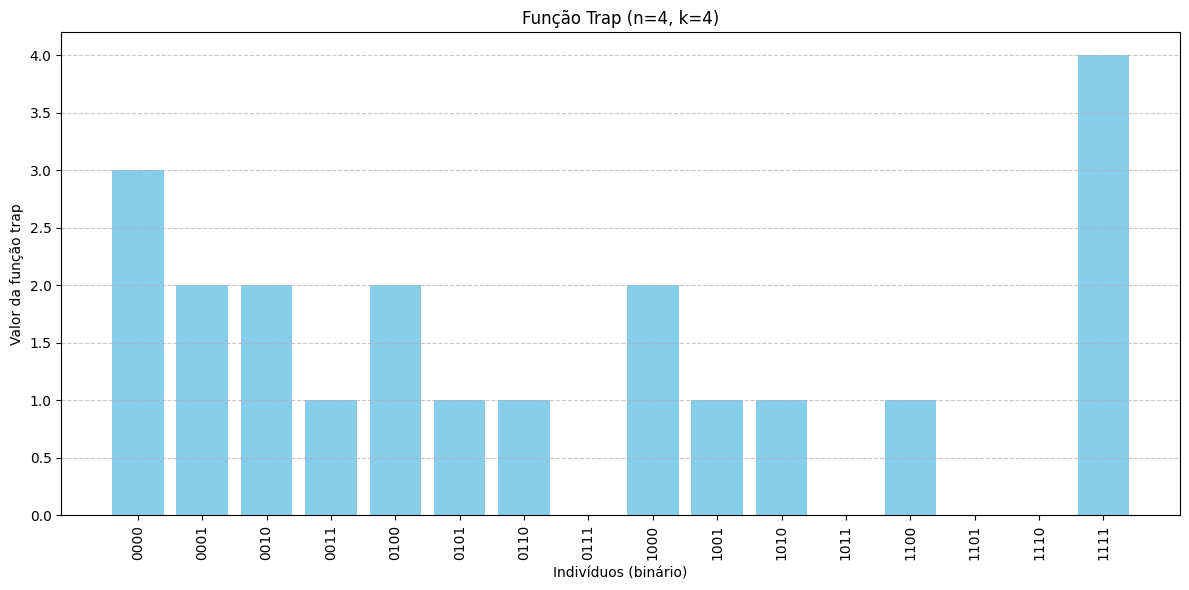

In [51]:
import matplotlib.pyplot as plt
import itertools

# Definindo a função Trap
def trap(x, k):
    """
    Função de avaliação do tipo trap de ordem k.

    Esta função avalia um vetor binário x usando blocos de tamanho k.
    Para cada bloco:
    - Se a soma dos bits for igual a k (todos 1s), retorna k (ótimo global).
    - Caso contrário, retorna k - 1 - soma (desencorajando soluções parcialmente corretas).

    Esta função é usada para estudar problemas enganosos (deceptivos) em algoritmos genéticos,
    pois pode induzir convergência para soluções locais ruins se a recombinação não for adequada.

    Args:
        x (list[int]): Vetor binário (lista de 0s e 1s) representando um cromossomo.
        k (int): Tamanho do bloco (subgrupo) a ser usado na decomposição da string.

    Raises:
        ValueError: Se o comprimento do vetor x não for múltiplo de k.

    Returns:
        int: Valor total do fitness calculado somando os valores de cada bloco.
    """
    if len(x) % k != 0:
        raise ValueError(
            f"Tamanho do cromossomo ({len(x)}) não é múltiplo de k = {k}."
        )
    fitness = 0
    for i in range(0, len(x), k):
        sub = x[i:i+k]
        sum_bits = sum(sub)
        if sum_bits == k:
            fitness += k
        else:
            fitness += k - 1 - sum_bits
    return fitness

# Contexto apenas para plot do gráfico no caso n=4 e k=4
if __name__ == "__main__":
    # Parâmetros
    n = 4  # Tamanho do indivíduo
    k = 4  # Tamanho do bloco na função trap

    # Gerar todos os indivíduos possíveis de tamanho n (listas de 0 e 1)
    pop = list(itertools.product([0, 1], repeat=n))

    # Calcular o fitness para cada indivíduo
    fitness_values = [trap(ind, k) for ind in pop]

    # Converter os indivíduos em strings para o eixo x
    labels = [''.join(map(str, ind)) for ind in pop]

    # Plotando
    plt.figure(figsize=(12, 6))
    plt.bar(labels, fitness_values, color='skyblue')
    plt.xlabel('Indivíduos (binário)')
    plt.ylabel('Valor da função trap')
    plt.title(f'Função Trap (n={n}, k={k})')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

**📈 Gráfico com linha conectando pontos indicados na tabela:**

| Bloco (bits) | $u = \sum x_i$ | $\text{trap}_4(u)$ |
|--------------|--------------------|-------------------------|
| 1111         | 4                  | 4                       |
| 1110         | 3                  | 0                       |
| 1100         | 2                  | 1                       |
| 1000         | 1                  | 2                       |
| 0000         | 0                  | 3                       |

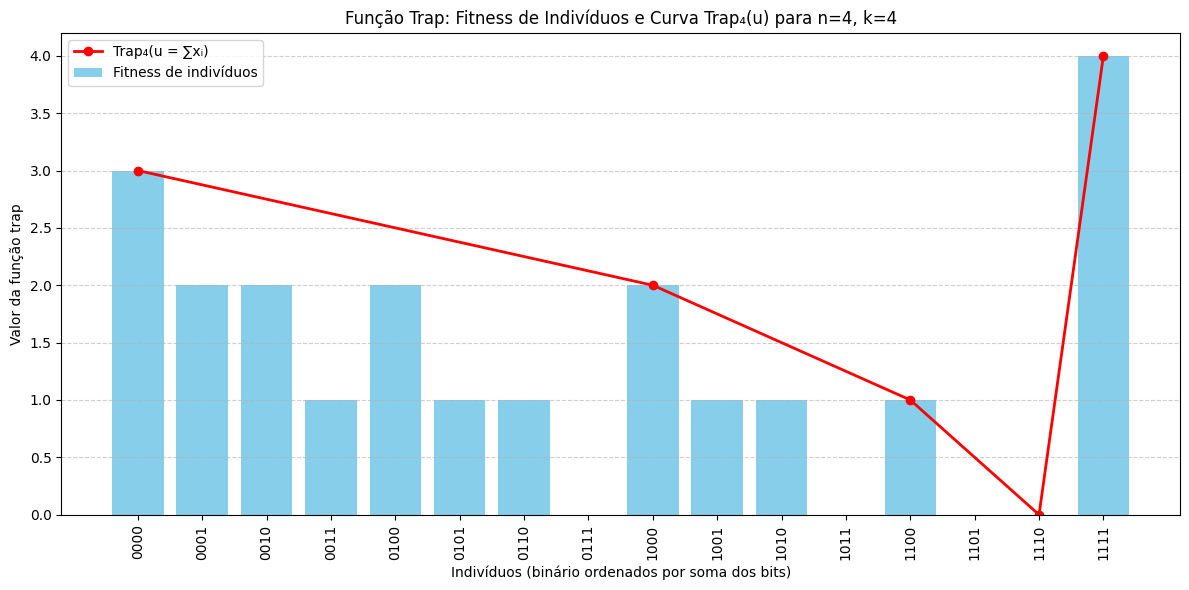

In [52]:
# Gerar todos os indivíduos binários possíveis de tamanho n
pop = list(itertools.product([0, 1], repeat=4))

# Calcular fitness e soma de bits (u) para cada indivíduo
fitness_values = [trap(ind, 4) for ind in pop]
    
labels = [''.join(map(str, ind)) for ind in pop]

# Início do plot
plt.figure(figsize=(12, 6))

# Gráfico de barras dos indivíduos
bars = plt.bar(labels, fitness_values, color='skyblue', label="Fitness de indivíduos")

# Curva teórica da função trap₄(u)
x_plot = [0, 8, 12, 14, 15]
y_plot = [3, 2, 1, 0, 4]

# Plot da curva sobreposta
plt.plot(x_plot, y_plot, color='red', marker='o', linewidth=2, label="Trap₄(u = ∑xᵢ)")

# Eixos e rótulos
plt.xlabel('Indivíduos (binário ordenados por soma dos bits)')
plt.ylabel('Valor da função trap')
plt.title(f'Função Trap: Fitness de Indivíduos e Curva Trap₄(u) para n={n}, k={k}')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Experimentos

### 2.1. Método de execução experimental com DEAP

O método a seguir será util para execução de diversos experimentos, tanto para variações espaciais quanto temporais.

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms
import random
import pandas as pd
from tqdm import tqdm

def run_experiment(num_runs, pop_sizes, trap_sizes, chromosome_size=30, 
                   crossover_prob=0.7, mutation_prob=0.01, max_generations=100):
    """
    Executa o experimento para diferentes tamanhos de população e funções trap.
    
    Args:
        num_runs: Número de execuções independentes para cada configuração
        pop_sizes: Lista de tamanhos de população a serem testados
        trap_sizes: Lista de tamanhos de trap a serem testados
        chromosome_size: Tamanho do cromossomo (deve ser múltiplo do maior valor em trap_sizes)
        crossover_prob: Probabilidade de crossover
        mutation_prob: Probabilidade de mutação
        max_generations: Número máximo de gerações
        
    Returns:
        DataFrame com os resultados
    """
    # Definindo a função Trap
    def trap_fitness(individual, k):
        """
        Função trap de tamanho k.
        Se a soma dos bits for k, retorna k.
        Caso contrário, retorna k-1-soma.
        """
        fitness = 0
        # Dividir o indivíduo em subgrupos de tamanho k
        for i in range(0, len(individual), k):
            sub = individual[i:i+k]
            sum_bits = sum(sub)
            if sum_bits == k:
                fitness += k
            else:
                fitness += k - 1 - sum_bits
        return fitness,
    
    
    results = []
    
    # Configurando a barra de progresso para o total de experimentos
    total_experiments = len(pop_sizes) * len(trap_sizes) * num_runs
    progress_bar = tqdm(total=total_experiments, desc="Executando experimentos")
    
    for k in trap_sizes:
        # Garantir que o tamanho do cromossomo é múltiplo de k
        adjusted_chromosome_size = (chromosome_size // k) * k
        
        for pop_size in pop_sizes:
            for run in range(num_runs):
                # Configuração do problema
                creator.create("FitnessMax", base.Fitness, weights=(1.0,))
                creator.create("Individual", list, fitness=creator.FitnessMax)
                
                toolbox = base.Toolbox()
                toolbox.register("attr_bool", random.randint, 0, 1)
                toolbox.register("individual", tools.initRepeat, creator.Individual, 
                                 toolbox.attr_bool, n=adjusted_chromosome_size)
                toolbox.register("population", tools.initRepeat, list, toolbox.individual)
                
                # Registrar operadores genéticos
                toolbox.register("evaluate", trap_fitness, k=k)
                toolbox.register("mate", tools.cxTwoPoint)
                toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_prob)
                toolbox.register("select", tools.selTournament, tournsize=3)
                
                # Criar população inicial
                pop = toolbox.population(n=pop_size)
                
                # Configurar estatísticas
                stats = tools.Statistics(lambda ind: ind.fitness.values)
                stats.register("avg", np.mean)
                stats.register("std", np.std)
                stats.register("min", np.min)
                stats.register("max", np.max)
                
                # Executar algoritmo
                pop, logbook = algorithms.eaSimple(
                    pop, toolbox, cxpb=crossover_prob, mutpb=mutation_prob,
                    ngen=max_generations, stats=stats, verbose=False
                )
                
                # Extrair resultados
                gen = logbook.select("gen")
                fit_max = logbook.select("max")
                
                # Registrar resultado
                best_fitness = fit_max[-1]
                generations_to_converge = gen[-1]
                
                results.append({
                    "run": run,
                    "k": k,
                    "pop_size": pop_size,
                    "best_fitness": best_fitness,
                    "generations": generations_to_converge,
                    "optimal_reached": best_fitness == adjusted_chromosome_size,
                })
                
                # Limpar definições do DEAP para próxima execução
                del creator.FitnessMax
                del creator.Individual
                
                # Atualizar a barra de progresso
                progress_bar.update(1)
    
    progress_bar.close()
    return pd.DataFrame(results)

### 2.2. Experimentos Espaciais

#### 2.2.1. Teste com Grandes Populações ($log_{10}$)

No expertimento a seguir, utilizamos o tamanho do cromossomo fixo e divisivel pelas quantidades de armadilhas propostas.
**Cuidado!** A execução do código a seguir pode demorar pouco mais do que meia hora.

Iniciando experimento de algoritmos genéticos com funções trap
Testando tamanhos de população: [10, 100, 1000, 10000, 100000]
Testando tamanhos de trap (k): [3, 4, 5]
Número de execuções por configuração: 30


Executando experimentos: 100%|██████████| 450/450 [31:23<00:00,  4.19s/it]


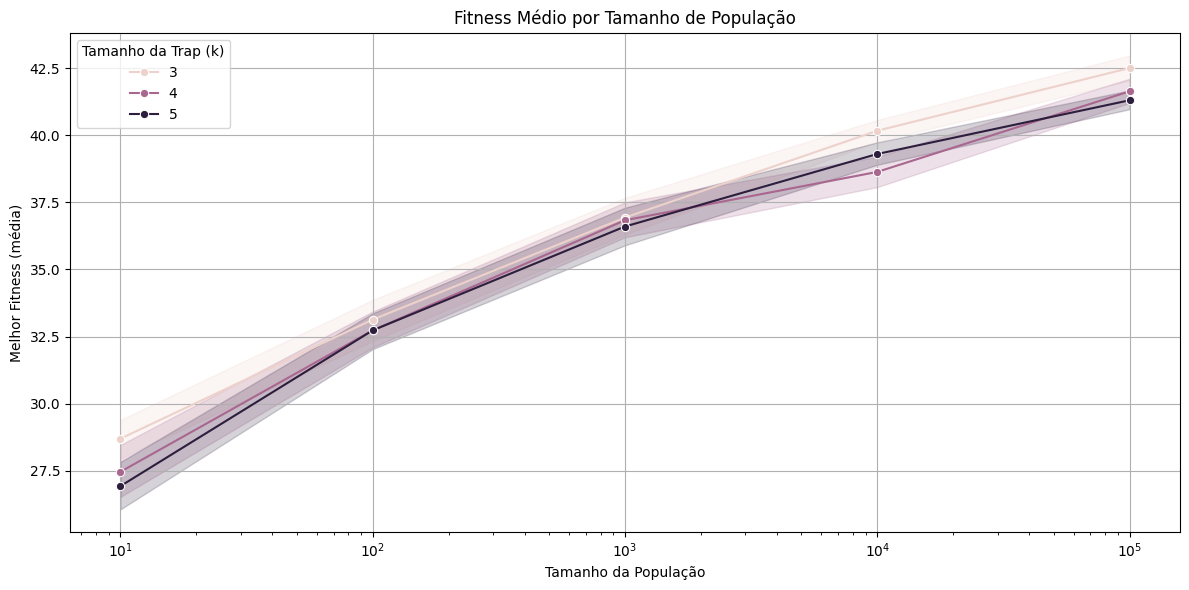

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do experimento
NUM_RUNS = 30  # Número de execuções independentes para cada configuração
POP_SIZES = [10, 10**2, 10**3, 10**4, 10**5]  # Tamanhos de população a testar
TRAP_SIZES = [3, 4, 5]  # Tamanhos de trap a testar
CHROMOSOME_SIZE = 60
MAX_GENERATIONS = 1

print("Iniciando experimento de algoritmos genéticos com funções trap")
print(f"Testando tamanhos de população: {POP_SIZES}")
print(f"Testando tamanhos de trap (k): {TRAP_SIZES}")
print(f"Número de execuções por configuração: {NUM_RUNS}")

# Executar o experimento
results = run_experiment(NUM_RUNS, POP_SIZES, TRAP_SIZES, CHROMOSOME_SIZE, max_generations=MAX_GENERATIONS)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='pop_size', y='best_fitness', hue='k', marker='o')

plt.xscale('log', base=10)

plt.title('Fitness Médio por Tamanho de População')
plt.xlabel('Tamanho da População')
plt.ylabel('Melhor Fitness (média)')
plt.grid(True)
plt.legend(title='Tamanho da Trap (k)')
plt.tight_layout()
plt.show()

Observe que neste caso, o comportamento da população frente a variação das armadilhas teve pequena variação, embora para o caso $k=3$ tenhamos médias maiores em todas populações testadas.

#### 2.2.2. Teste População $log_2$ e *traps* incrementais em 1

No expertimento a seguir, utilizamos o tamanho do cromossomo variável, iniciando com 16 e permitindo ajuste conforme a variação do $k$. A armadilhas propostas iniciam em $k=3$ e vão um a um até $k=8$. Os tamanhos da população são $log_2$ de 3 á 11.

Iniciando experimento de algoritmos genéticos com funções trap
Testando tamanhos de população: [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
Testando tamanhos de trap (k): [3, 4, 5, 6, 7, 8, 9]
Número de execuções por configuração: 50


Executando experimentos: 100%|██████████| 3500/3500 [04:48<00:00, 12.12it/s] 


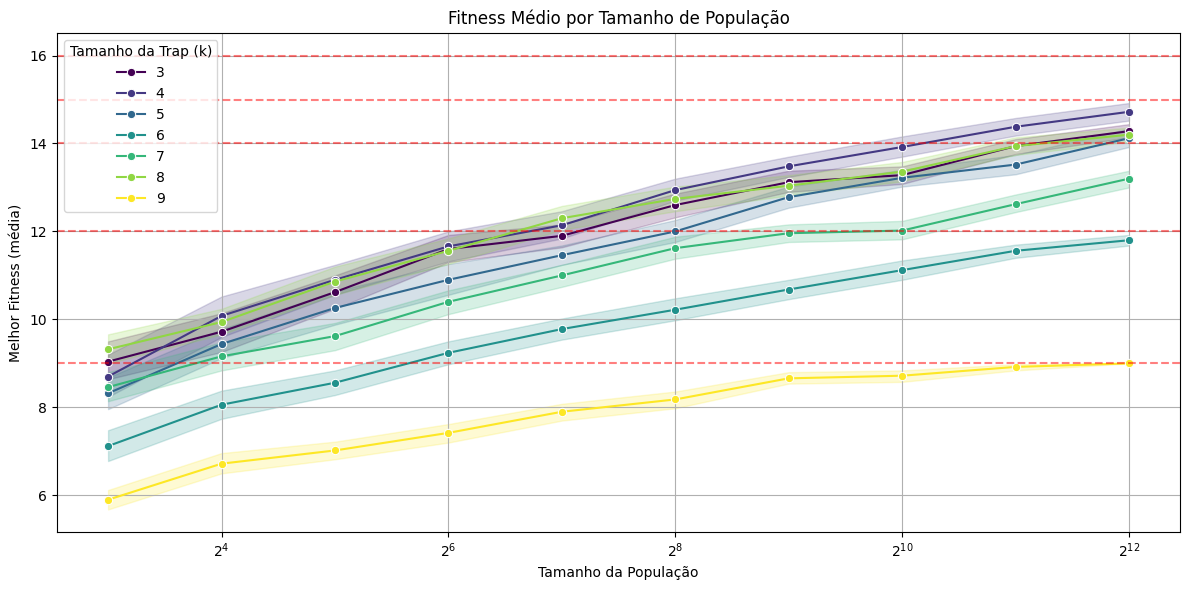

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do experimento
NUM_RUNS = 50  # Número de execuções independentes para cada configuração
POP_SIZES = [2**i for i in range(3, 13)]  # Tamanhos de população a testar
TRAP_SIZES = [k for k in range(3,10)]  # Tamanhos de trap a testar
CHROMOSOME_SIZE = 16
MAX_GENERATIONS=1

print("Iniciando experimento de algoritmos genéticos com funções trap")
print(f"Testando tamanhos de população: {POP_SIZES}")
print(f"Testando tamanhos de trap (k): {TRAP_SIZES}")
print(f"Número de execuções por configuração: {NUM_RUNS}")

# Executar o experimento
results = run_experiment(NUM_RUNS, POP_SIZES, TRAP_SIZES, CHROMOSOME_SIZE, max_generations=MAX_GENERATIONS)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='pop_size', y='best_fitness', hue='k', marker='o', palette='viridis')

plt.xscale('log', base=2)  # Escala logarítmica base 2 no eixo x

plt.title('Fitness Médio por Tamanho de População')
plt.xlabel('Tamanho da População')
plt.ylabel('Melhor Fitness (média)')
plt.grid(True)
plt.legend(title='Tamanho da Trap (k)')


# Linhas de referência
plt.axhline(y=9, color='red', linestyle='--', alpha=0.5, label='9')  
plt.axhline(y=12, color='red', linestyle='--', alpha=0.5, label='12')  
plt.axhline(y=14, color='red', linestyle='--', alpha=0.5, label='14') 
plt.axhline(y=15, color='red', linestyle='--', alpha=0.5, label='15')  
plt.axhline(y=16, color='red', linestyle='--', alpha=0.5, label='16')  

plt.tight_layout()
plt.show()

Neste experimento podemos observar o efeito da variação do tamanho do cromossomo para ajustar os blocos de armadilha, por exemplo, observe que o caso $k=7$ é muito pior que os demais, a seguir apresentamos a tabela dos tamanhos dos cromossomos em cada caso:

| k | Tamanho do Cromossomo |
|---|-----------------------|
| 3 | 15                    |
| 4 | 16                    |
| 5 | 15                    |
| 6 | 12                    |
| 7 | 14                    |
| 8 | 16                    |
| 9 | 9                    |

### 2.3. Método Randômico sem uso do DEAP

O método a seguir foi implementado exclusivamente para a realização de testes espaciais, evitando a sobrecarga da biblioteca DEAP. Essa abordagem permite reduzir o tempo de execução dos experimentos, viabilizando o uso de valores maiores para o número de execuções e o tamanho da população.

Iniciando experimento de algoritmos genéticos com funções trap
Testando tamanhos de população: [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
Testando tamanhos de trap (k): [4, 8, 16, 32]
Número de execuções por configuração: 100


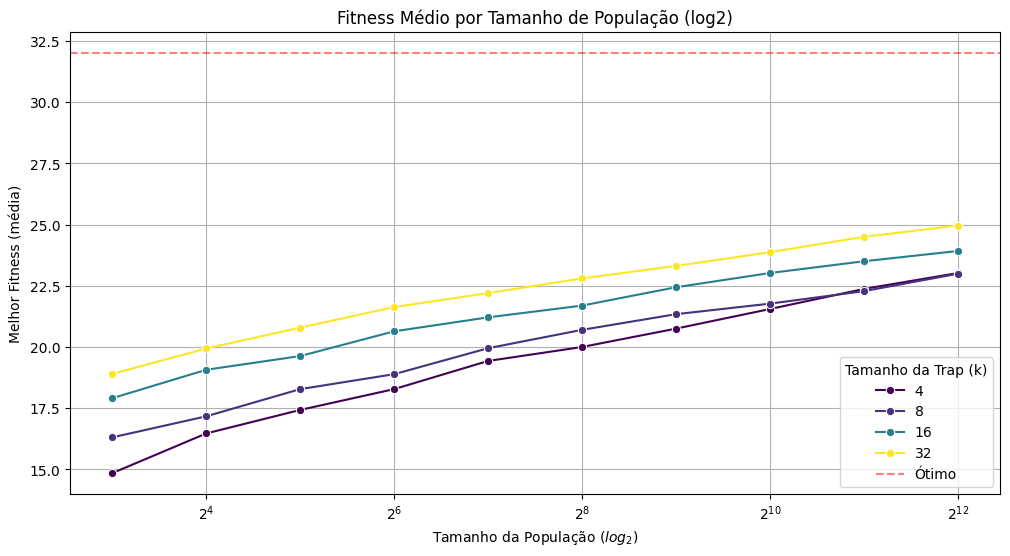

In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def run_experiment_random(num_runs, pop_sizes, trap_sizes, chromosome_size):
    def create_individual(length):
        return [random.randint(0, 1) for _ in range(length)]

    def initialize_population(size, length):
        return [create_individual(length) for _ in range(size)]

    def best_fitness(population, k):
        return max(trap(ind, k) for ind in population)
    
    results = []
    best_def = 2**chromosome_size
    for k in trap_sizes:                
        adjusted_chromosome_size = (chromosome_size // k) * k
        for pop_size in pop_sizes:
            fitnesses = []
            count_best_dev = 0
            for _ in range(num_runs):
                population = initialize_population(pop_size, adjusted_chromosome_size)
                best = best_fitness(population, k)
                fitnesses.append(best)
                if best == best_def:
                    count_best_dev += 1
            
            avg_fitness = sum(fitnesses) / len(fitnesses)
            results.append({
                'pop_size': pop_size,
                'k': k,
                'best_fitness': avg_fitness,
                'count_best': count_best_dev
            })
    return pd.DataFrame(results)

    
NUM_RUNS = 100
POP_SIZES = [2 ** i for i in range(3, 13)]
TRAP_SIZES = [2 ** i for i in range(2, 6)]
CHROMOSOME_SIZE = 32

print("Iniciando experimento de algoritmos genéticos com funções trap")
print(f"Testando tamanhos de população: {POP_SIZES}")
print(f"Testando tamanhos de trap (k): {TRAP_SIZES}")
print(f"Número de execuções por configuração: {NUM_RUNS}")

results = run_experiment_random(NUM_RUNS, POP_SIZES, TRAP_SIZES, CHROMOSOME_SIZE)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='pop_size', y='best_fitness', hue='k', marker='o', palette='viridis')
plt.axhline(y=CHROMOSOME_SIZE, color='red', linestyle='--', alpha=0.5, label='Ótimo')  

plt.xscale('log', base=2)
plt.title('Fitness Médio por Tamanho de População (log2)')
plt.xlabel('Tamanho da População ($log_2$)')
plt.ylabel('Melhor Fitness (média)')
plt.grid(True)
plt.legend(title='Tamanho da Trap (k)')
plt.show()

A seguir, executamos o experimento utilizando o método baseado na biblioteca DEAP. Enquanto o tempo de execução do método anterior é de aproximadamente 2 minutos, este leva cerca de 7 minutos. Ainda assim, os resultados gráficos permanecem consistentes entre ambas as abordagens, conforme esperado.

Iniciando experimento de algoritmos genéticos com funções trap
Testando tamanhos de população: [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
Testando tamanhos de trap (k): [4, 8, 16, 32]
Número de execuções por configuração: 100


Executando experimentos: 100%|██████████| 4000/4000 [06:24<00:00, 10.42it/s] 


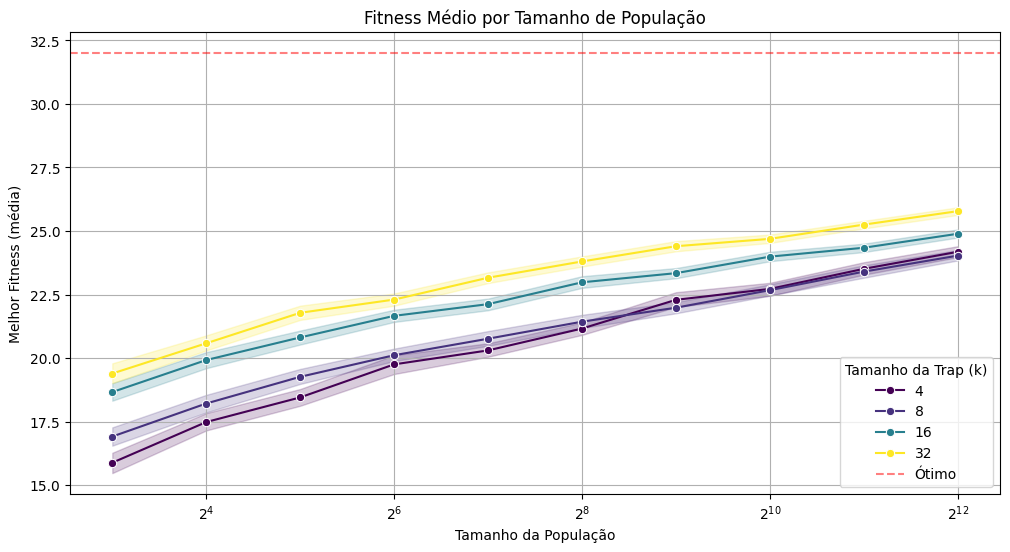

In [87]:
print("Iniciando experimento de algoritmos genéticos com funções trap")
print(f"Testando tamanhos de população: {POP_SIZES}")
print(f"Testando tamanhos de trap (k): {TRAP_SIZES}")
print(f"Número de execuções por configuração: {NUM_RUNS}")

# Executar o experimento
results = run_experiment(NUM_RUNS, POP_SIZES, TRAP_SIZES, CHROMOSOME_SIZE, max_generations=MAX_GENERATIONS)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='pop_size', y='best_fitness', hue='k', marker='o', palette='viridis')
plt.axhline(y=CHROMOSOME_SIZE, color='red', linestyle='--', alpha=0.5, label='Ótimo')  

plt.xscale('log', base=2)  # Escala logarítmica base 2 no eixo x

plt.title('Fitness Médio por Tamanho de População')
plt.xlabel('Tamanho da População')
plt.ylabel('Melhor Fitness (média)')
plt.grid(True)
plt.legend(title='Tamanho da Trap (k)')
plt.show()

A seguir apresentamos os resultados para populações maiores de $2^3$ a $2^{16}$.

Iniciando experimento de algoritmos genéticos com funções trap
Testando tamanhos de população: [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
Testando tamanhos de trap (k): [4, 8, 16, 32]
Número de execuções por configuração: 50


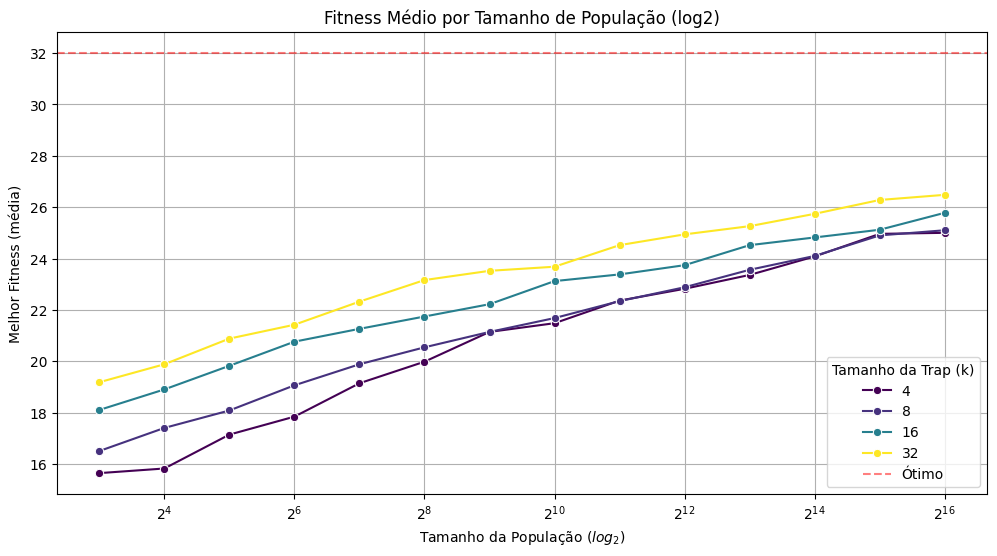

In [88]:
NUM_RUNS = 50
POP_SIZES = [2 ** i for i in range(3, 17)]
TRAP_SIZES = [2 ** i for i in range(2, 6)]
CHROMOSOME_SIZE = 32

print("Iniciando experimento de algoritmos genéticos com funções trap")
print(f"Testando tamanhos de população: {POP_SIZES}")
print(f"Testando tamanhos de trap (k): {TRAP_SIZES}")
print(f"Número de execuções por configuração: {NUM_RUNS}")

results = run_experiment_random(NUM_RUNS, POP_SIZES, TRAP_SIZES, CHROMOSOME_SIZE)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='pop_size', y='best_fitness', hue='k', marker='o', palette='viridis')
plt.axhline(y=CHROMOSOME_SIZE, color='red', linestyle='--', alpha=0.5, label='Ótimo')  

plt.xscale('log', base=2)
plt.title('Fitness Médio por Tamanho de População (log2)')
plt.xlabel('Tamanho da População ($log_2$)')
plt.ylabel('Melhor Fitness (média)')
plt.grid(True)
plt.legend(title='Tamanho da Trap (k)')
plt.show()

## 3. Análise de Esquemas e Blocos Construtores

In [96]:
import random
from collections import Counter

# Criação de indivíduos
def create_individual(length):
    return [random.randint(0, 1) for _ in range(length)]

# Inicialização da população
def initialize_population(size, length):
    return [create_individual(length) for _ in range(size)]

# Converte uma lista de bits em string
def bitstring(individual):
    return ''.join(map(str, individual))

# Gera todos os esquemas com wildcards fixando posições específicas
def generate_schema(individual, fixed_positions):
    return ''.join(str(g) if i in fixed_positions else '*' for i, g in enumerate(individual))

# Gera esquemas de todos os indivíduos, com até N posições fixas
def extract_schemas(population, max_fixed=3):
    schemas = []
    length = len(population[0])
    for ind in population:
        for i in range(length):
            for j in range(i+1, length):
                for k in range(j+1, length):
                    schemas.append(generate_schema(ind, [i, j, k]))
    return Counter(schemas)

# Identifica blocos otimizados (todos 1s) por posição
def find_block_builders(population, k):
    length = len(population[0])
    blocks = []
    for i in range(0, length, k):
        block = tuple(ind[i:i+k] for ind in population)
        count = Counter(tuple(b) for b in block)
        blocks.append(count)
    return blocks

In [97]:
import matplotlib.pyplot as plt

# Plot dos esquemas frequentes
def plot_schemas(schema_counts, top_n=10):
    top_schemas = schema_counts.most_common(top_n)
    labels = [s for s, _ in top_schemas]
    values = [c for _, c in top_schemas]
    
    plt.figure(figsize=(10, 5))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel("Frequência")
    plt.ylabel("Esquemas")
    plt.title(f"Top {top_n} Esquemas Frequentes")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot dos blocos por posição
def plot_blocks(blocks):
    for i, block_count in enumerate(blocks):
        labels = [''.join(map(str, b)) for b in block_count.keys()]
        values = list(block_count.values())

        plt.figure(figsize=(8, 4))
        plt.bar(labels, values, color='lightgreen')
        plt.xlabel("Blocos")
        plt.ylabel("Frequência")
        plt.title(f"Frequência de Blocos – Bloco {i+1}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


=== Esquemas Frequentes (até 3 posições fixas) ===
100* → 11 indivíduos
001* → 11 indivíduos
1*00 → 11 indivíduos
*101 → 10 indivíduos
1*01 → 10 indivíduos
111* → 10 indivíduos
11*1 → 10 indivíduos
0*11 → 10 indivíduos
*011 → 10 indivíduos
110* → 10 indivíduos


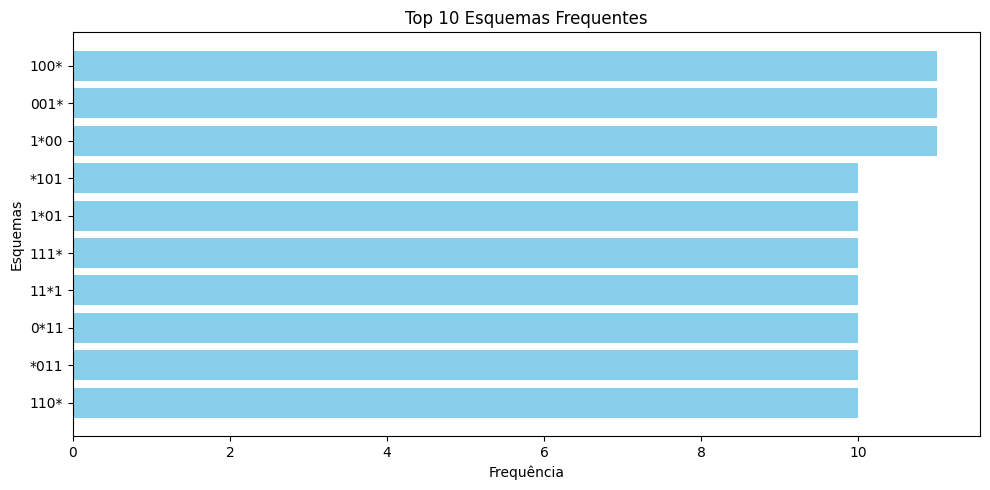


=== Block Builders (frequência de blocos por posição) ===
Bloco 1:
  0011 → 7 vezes
  1000 → 6 vezes
  0101 → 5 vezes
  1001 → 5 vezes
  1111 → 5 vezes
  1101 → 5 vezes
  1110 → 5 vezes
  1100 → 5 vezes
  0110 → 4 vezes
  0010 → 4 vezes
  0100 → 3 vezes
  1011 → 3 vezes
  0111 → 3 vezes
  0000 → 2 vezes
  1010 → 1 vezes
  0001 → 1 vezes


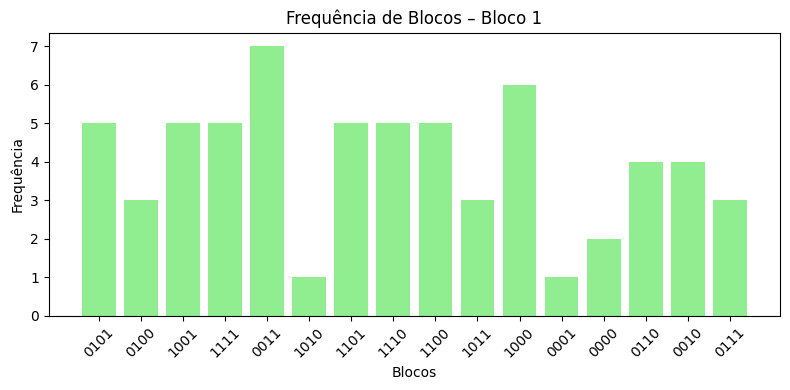

In [98]:
pop_size = 64
k = 4
num_blocks = 1
chromosome_size = k * num_blocks

population = initialize_population(pop_size, chromosome_size)
fitnesses = [trap(ind, k) for ind in population]

#print("\n=== População Inicial ===")
#for ind, fit in zip(population, fitnesses):
#    print(f"{bitstring(ind)} → Fitness: {fit}")

print("\n=== Esquemas Frequentes (até 3 posições fixas) ===")
schema_counts = extract_schemas(population)
for schema, count in schema_counts.most_common(10):
    print(f"{schema} → {count} indivíduos")

plot_schemas(schema_counts)

print("\n=== Block Builders (frequência de blocos por posição) ===")
blocks = find_block_builders(population, k)
for i, block_count in enumerate(blocks):
    print(f"Bloco {i+1}:")
    for block, freq in block_count.most_common():
        print(f"  {''.join(map(str, block))} → {freq} vezes")

plot_blocks(blocks)


=== Esquemas Frequentes (até 3 posições fixas) ===
0******11 → 16 indivíduos
*0***1*1* → 16 indivíduos
*****1*11 → 16 indivíduos
******011 → 16 indivíduos
*0***1**1 → 15 indivíduos
***00***1 → 15 indivíduos
***0*1*1* → 15 indivíduos
****0*01* → 15 indivíduos
0****1**1 → 14 indivíduos
*0****01* → 14 indivíduos


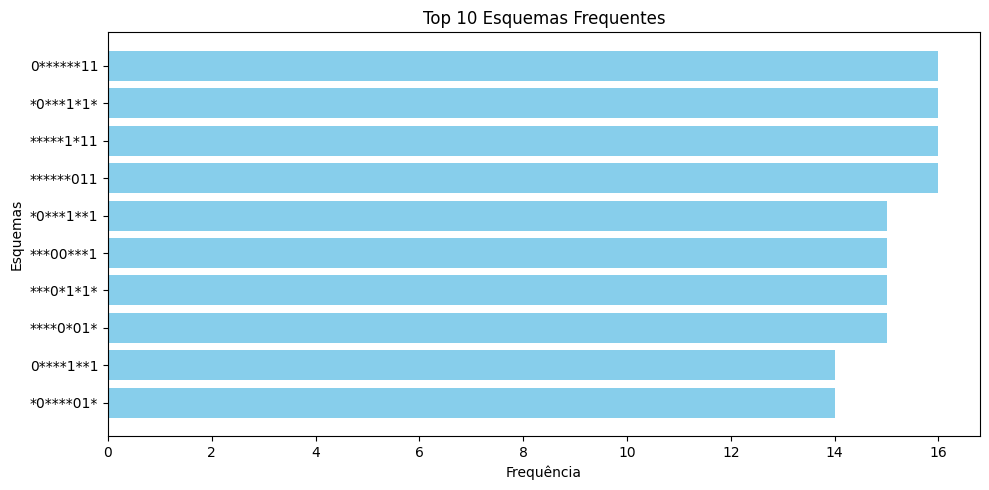


=== Block Builders (frequência de blocos por posição) ===
Bloco 1:
  000111011 → 2 vezes
  101001011 → 2 vezes
  001111011 → 1 vezes
  101110110 → 1 vezes
  111100000 → 1 vezes
  001101100 → 1 vezes
  000000101 → 1 vezes
  000011111 → 1 vezes
  111101110 → 1 vezes
  011110010 → 1 vezes
  011100111 → 1 vezes
  111101101 → 1 vezes
  001001001 → 1 vezes
  110101100 → 1 vezes
  100110110 → 1 vezes
  000010111 → 1 vezes
  111010100 → 1 vezes
  101001010 → 1 vezes
  010000000 → 1 vezes
  100011111 → 1 vezes
  001000000 → 1 vezes
  000111001 → 1 vezes
  000000001 → 1 vezes
  001000111 → 1 vezes
  110001011 → 1 vezes
  000011011 → 1 vezes
  110111100 → 1 vezes
  110000000 → 1 vezes
  100101011 → 1 vezes
  111100011 → 1 vezes
  011101011 → 1 vezes
  011001111 → 1 vezes
  101110011 → 1 vezes
  010011110 → 1 vezes
  110011110 → 1 vezes
  010100011 → 1 vezes
  010000111 → 1 vezes
  000001110 → 1 vezes
  010000110 → 1 vezes
  110100010 → 1 vezes
  000110010 → 1 vezes
  011010000 → 1 vezes
  101011

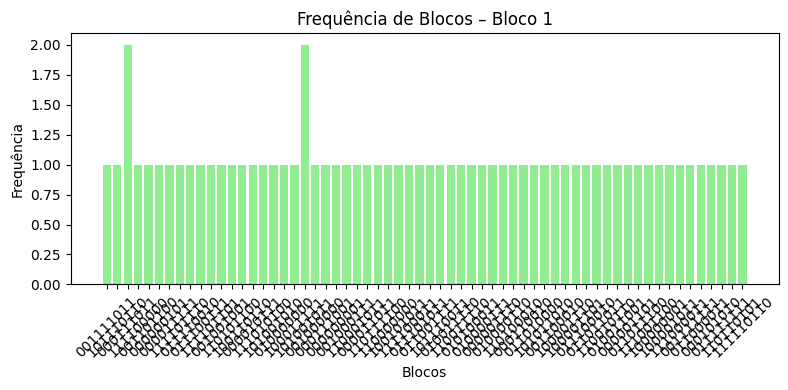

In [99]:
pop_size = 64
k = 9
chromosome_size = 9

population = initialize_population(pop_size, chromosome_size)
fitnesses = [trap(ind, k) for ind in population]

print("\n=== Esquemas Frequentes (até 3 posições fixas) ===")
schema_counts = extract_schemas(population)
for schema, count in schema_counts.most_common(10):
    print(f"{schema} → {count} indivíduos")

plot_schemas(schema_counts)

print("\n=== Block Builders (frequência de blocos por posição) ===")
blocks = find_block_builders(population, k)
for i, block_count in enumerate(blocks):
    print(f"Bloco {i+1}:")
    for block, freq in block_count.most_common():
        print(f"  {''.join(map(str, block))} → {freq} vezes")

plot_blocks(blocks)



=== Esquemas Frequentes (até 3 posições fixas) ===
**10*********0 → 16 indivíduos
**1****1**1*** → 16 indivíduos
**1****1*****0 → 16 indivíduos
**1*****0****0 → 16 indivíduos
*01**********0 → 16 indivíduos
1*1*******1*** → 15 indivíduos
**1******0**0* → 15 indivíduos
1*1**********0 → 15 indivíduos
**1*1********0 → 15 indivíduos
**1**0*******0 → 15 indivíduos


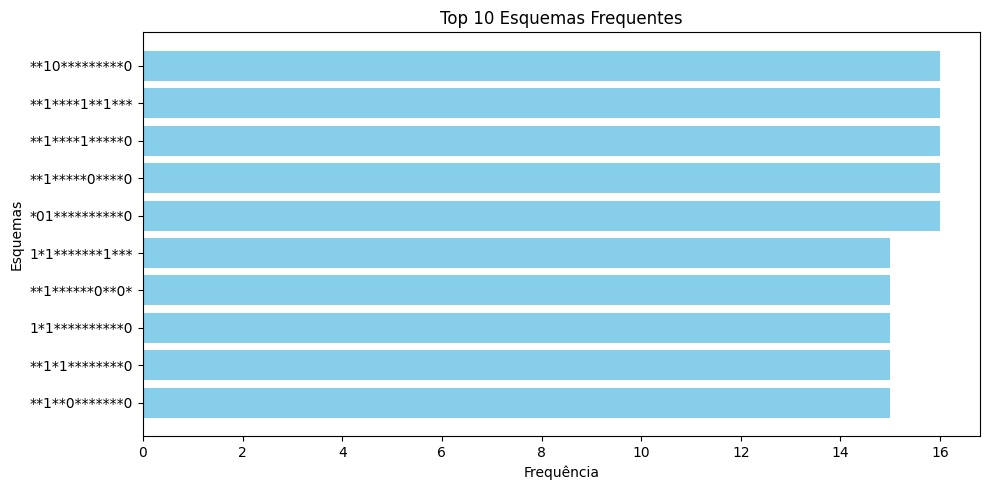


=== Block Builders (frequência de blocos por posição) ===
Bloco 1:
  0111011 → 3 vezes
  1011100 → 2 vezes
  1010111 → 2 vezes
  0001100 → 2 vezes
  1110010 → 2 vezes
  1111010 → 2 vezes
  1001011 → 2 vezes
  0110000 → 2 vezes
  0101111 → 2 vezes
  0111001 → 2 vezes
  0011101 → 2 vezes
  0010101 → 2 vezes
  1110101 → 1 vezes
  0100110 → 1 vezes
  1100010 → 1 vezes
  0001001 → 1 vezes
  1000110 → 1 vezes
  0101001 → 1 vezes
  1010001 → 1 vezes
  1110110 → 1 vezes
  0101011 → 1 vezes
  1100110 → 1 vezes
  0001111 → 1 vezes
  0110001 → 1 vezes
  0110111 → 1 vezes
  1110100 → 1 vezes
  0110100 → 1 vezes
  1011111 → 1 vezes
  0011100 → 1 vezes
  1100001 → 1 vezes
  1011000 → 1 vezes
  0100111 → 1 vezes
  1100000 → 1 vezes
  1110011 → 1 vezes
  1101101 → 1 vezes
  0010011 → 1 vezes
  0110110 → 1 vezes
  1011110 → 1 vezes
  1111000 → 1 vezes
  1000001 → 1 vezes
  1111100 → 1 vezes
  1011001 → 1 vezes
  1011011 → 1 vezes
  1010110 → 1 vezes
  1111001 → 1 vezes
  1010010 → 1 vezes
  1101001 → 

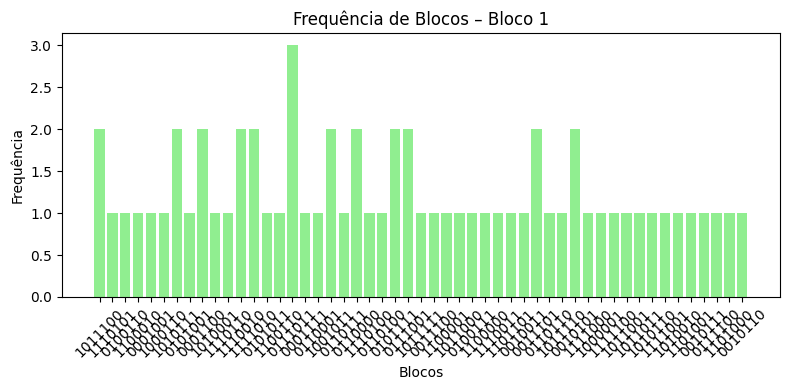

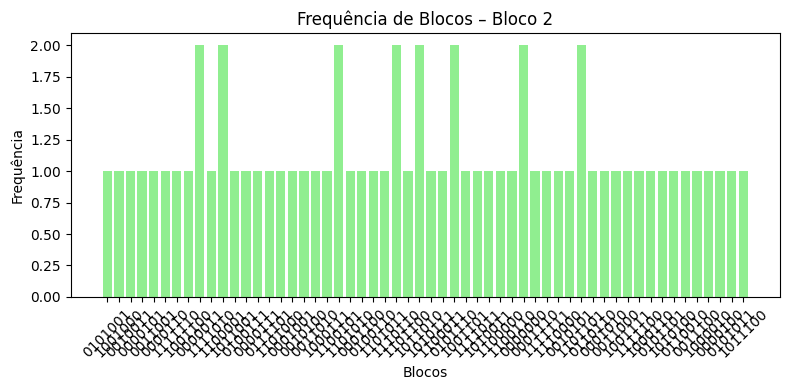

In [100]:
pop_size = 64
k = 7
chromosome_size = 14

population = initialize_population(pop_size, chromosome_size)
fitnesses = [trap(ind, k) for ind in population]

print("\n=== Esquemas Frequentes (até 3 posições fixas) ===")
schema_counts = extract_schemas(population)
for schema, count in schema_counts.most_common(10):
    print(f"{schema} → {count} indivíduos")

plot_schemas(schema_counts)

print("\n=== Block Builders (frequência de blocos por posição) ===")
blocks = find_block_builders(population, k)
for i, block_count in enumerate(blocks):
    print(f"Bloco {i+1}:")
    for block, freq in block_count.most_common():
        print(f"  {''.join(map(str, block))} → {freq} vezes")

plot_blocks(blocks)
